# An accurate diagnosis of Alzheimer's disease using entropy-based hybrid machine learning

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

#### LOADING THE DATASET

In [202]:
df = pd.read_csv(r'C:\Users\swetha\Desktop\oasis_longitudinal.csv')
print(df.shape)
df.head()

(373, 15)


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0018,OAS2_0018_MR1,Demented,1,0,F,R,87,14,1,30,0.0,1406,0.715,1.248
1,OAS2_0018,OAS2_0018_MR3,Demented,3,489,F,R,88,14,1,29,0.0,1398,0.713,1.255
2,OAS2_0018,OAS2_0018_MR4,Demented,4,1933,F,R,92,14,1,27,0.5,1423,0.696,1.234
3,OAS2_0020,OAS2_0020_MR1,Demented,1,0,M,R,80,20,1,29,0.0,1587,0.693,1.106
4,OAS2_0020,OAS2_0020_MR2,Demented,2,756,M,R,82,20,1,28,0.5,1606,0.677,1.093


In [203]:
df.shape

(373, 15)

In [204]:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         373 non-null    int64  
 10  MMSE        373 non-null    int64  
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(3), int64(7), object(5)
memory usage: 43.8+ KB


# DATA PREPROCESSING

#### REMOVING NULL VALUES

In [206]:
pd.isnull(df).sum() 

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

#### CHANGING THE ATTRIBUTES NAME

In [207]:
df.columns = ['Subject ID','MRI ID','Group','Visit','MR Delay','Gender','Dominant_Hand',
              'Age','Years_of_Education','Socioeconomic_Status','Mini_Mental_State_Examination',
              'Clinical_Dementia_Rating','Estimated_Total_Intracranial_Volume',
              'Normalize_Whole_Brain_Volume','Atlas_Scaling_Factor']

#### COUNTING THE VALUES FOR EACH ATTRIBUTES

In [208]:
df.Gender.value_counts()

F    213
M    160
Name: Gender, dtype: int64

In [209]:
df.Dominant_Hand.value_counts()

R    373
Name: Dominant_Hand, dtype: int64

In [210]:
df.Group.value_counts()

Nondemented    191
Demented       182
Name: Group, dtype: int64

In [211]:
df.Visit.value_counts()

1    150
2    144
3     58
4     15
5      6
Name: Visit, dtype: int64

In [212]:
df.Age.value_counts()

73    26
75    22
78    21
80    20
81    18
71    18
82    17
76    16
77    16
68    14
84    13
69    13
83    12
70    12
74    12
79    11
72    11
88    10
66    10
86    10
85     9
89     7
67     6
65     6
87     6
90     5
62     4
91     4
92     4
61     4
63     3
64     3
93     3
60     2
94     1
95     1
96     1
97     1
98     1
Name: Age, dtype: int64

In [213]:
df.Socioeconomic_Status.value_counts()

2    103
1     88
3     82
4     74
0     19
5      7
Name: Socioeconomic_Status, dtype: int64

In [214]:
df.Mini_Mental_State_Examination.value_counts()

30    114
29     91
28     45
27     32
26     20
25     12
23     11
21     11
20      7
22      7
17      5
24      4
19      3
16      3
18      2
15      2
0       2
4       1
7       1
Name: Mini_Mental_State_Examination, dtype: int64

In [215]:
df.Clinical_Dementia_Rating.value_counts()

0.0    206
0.5    123
1.0     41
2.0      3
Name: Clinical_Dementia_Rating, dtype: int64

In [216]:
df.Estimated_Total_Intracranial_Volume.value_counts()

1483    4
1475    4
1569    3
1506    3
1390    3
       ..
1271    1
1273    1
1274    1
1275    1
1534    1
Name: Estimated_Total_Intracranial_Volume, Length: 286, dtype: int64

In [217]:
df.Normalize_Whole_Brain_Volume.value_counts()

0.696    10
0.739     9
0.748     7
0.695     7
0.737     7
         ..
0.775     1
0.693     1
0.674     1
0.665     1
0.692     1
Name: Normalize_Whole_Brain_Volume, Length: 136, dtype: int64

In [218]:
df.Atlas_Scaling_Factor.value_counts()

1.184    5
1.190    5
1.183    4
1.134    4
1.208    3
        ..
1.231    1
1.193    1
1.234    1
1.296    1
1.281    1
Name: Atlas_Scaling_Factor, Length: 265, dtype: int64

#### DESCRIBING THE DATASET

In [219]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Visit,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
MR Delay,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
Age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
Years_of_Education,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
Socioeconomic_Status,373.0,2.335121,1.230340,0.000,1.000,2.000,3.000,5.000
Mini_Mental_State_Examination,373.0,27.195710,4.182244,0.000,27.000,29.000,30.000,30.000
Clinical_Dementia_Rating,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
Estimated_Total_Intracranial_Volume,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000
Normalize_Whole_Brain_Volume,373.0,0.729568,0.037135,0.644,0.700,0.729,0.756,0.837
Atlas_Scaling_Factor,373.0,1.195461,0.138092,0.876,1.099,1.194,1.293,1.587


#### DROPING THE UNNECCESSARY COLUMNS

In [220]:
df.drop(["Subject ID","MRI ID"],axis=1,inplace=True)

In [221]:
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])

# DATA VISUALIZATION

### BAR PLOT

#### BAR PLOT FOR GENDER ATTRIBUTE

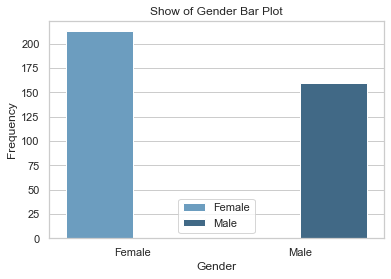

In [222]:
df['Gender'] = df['Gender'].replace(to_replace = {'F': 'Female', 'M': 'Male'})
sns.set(style='whitegrid')
ax=sns.barplot(x=df['Gender'].value_counts().index,y=df['Gender'].value_counts().values,palette="Blues_d",hue=['Female','Male'])
plt.legend(loc=8)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of Gender Bar Plot')
plt.show()

#### BAR PLOT FOR AGE ATTRIBUTE

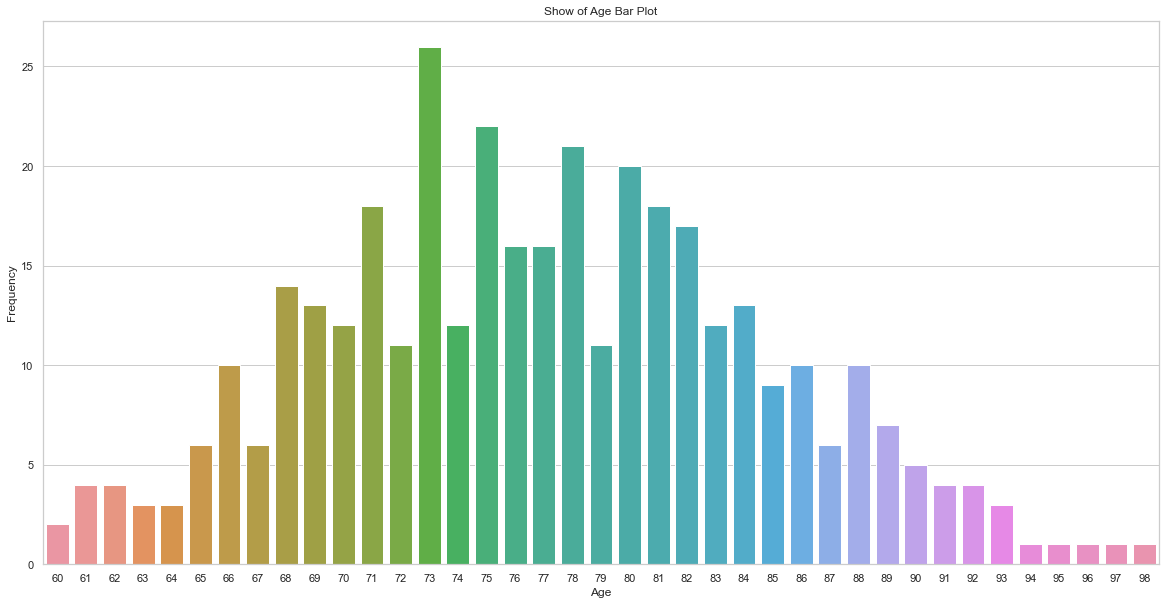

In [223]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Age'].value_counts().index,
              y=df['Age'].value_counts().values)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Show of Age Bar Plot')
plt.show()

#### BAR PLOT FOR GROUP ATTRIBUTE

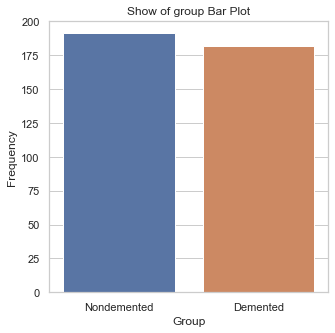

In [224]:
plt.figure(figsize=(5,5))
sns.barplot(x=df['Group'].value_counts().index,
              y=df['Group'].value_counts().values)
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.title('Show of group Bar Plot')
plt.show()

#### BAR PLOT FOR SOCIOECONOMIC STATUS ATTRIBUTE

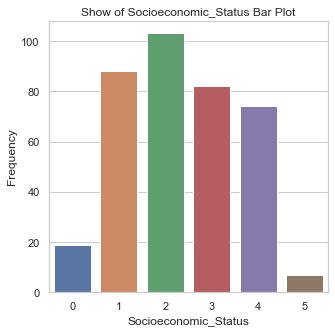

In [225]:
plt.figure(figsize=(5,5))
sns.barplot(x=df['Socioeconomic_Status'].value_counts().index,
              y=df['Socioeconomic_Status'].value_counts().values)
plt.xlabel('Socioeconomic_Status')
plt.ylabel('Frequency')
plt.title('Show of Socioeconomic_Status Bar Plot')
plt.show()

#### BAR PLOT FOR MINI MENTAL STATE EXAMINATION ATTRIBUTE

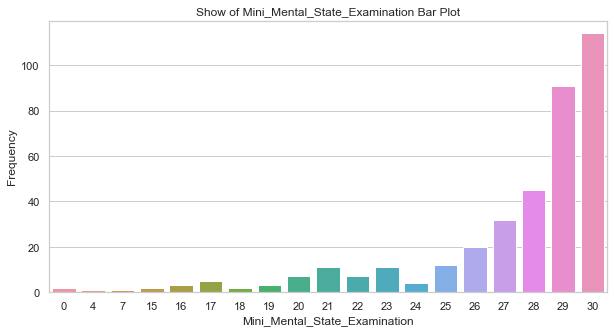

In [226]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Mini_Mental_State_Examination'].value_counts().index,
              y=df['Mini_Mental_State_Examination'].value_counts().values)
plt.xlabel('Mini_Mental_State_Examination')
plt.ylabel('Frequency')
plt.title('Show of Mini_Mental_State_Examination Bar Plot')
plt.show()

#### BAR PLOT FOR CLINICAL DEMENTIA RATING ATTRIBUTE 

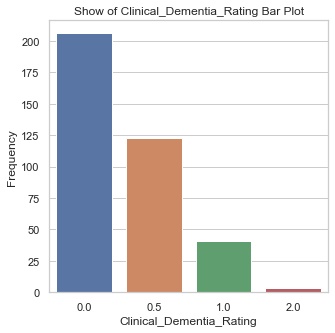

In [227]:
plt.figure(figsize=(5,5))
sns.barplot(x=df['Clinical_Dementia_Rating'].value_counts().index,
              y=df['Clinical_Dementia_Rating'].value_counts().values)
plt.xlabel('Clinical_Dementia_Rating')
plt.ylabel('Frequency')
plt.title('Show of Clinical_Dementia_Rating Bar Plot')
plt.show()

### PIE CHART DISTRIBUTION

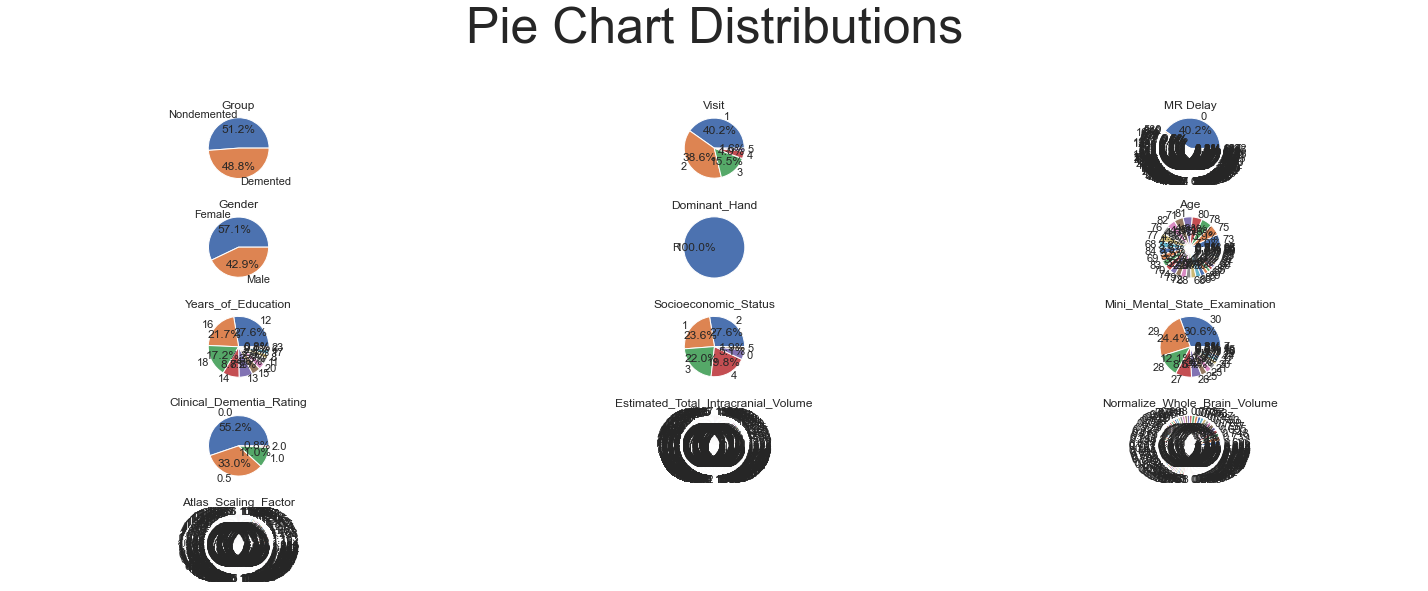

In [228]:
fig = plt.figure(figsize=(20, 10))
plt.suptitle('Pie Chart Distributions', fontsize=50)
for i in range(1, df.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df.columns.values[i - 1])
   
    values = df.iloc[:, i - 1].value_counts(normalize = True).values
    index = df.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

### HISTOGRAM FOR EACH ATTRIBUTES

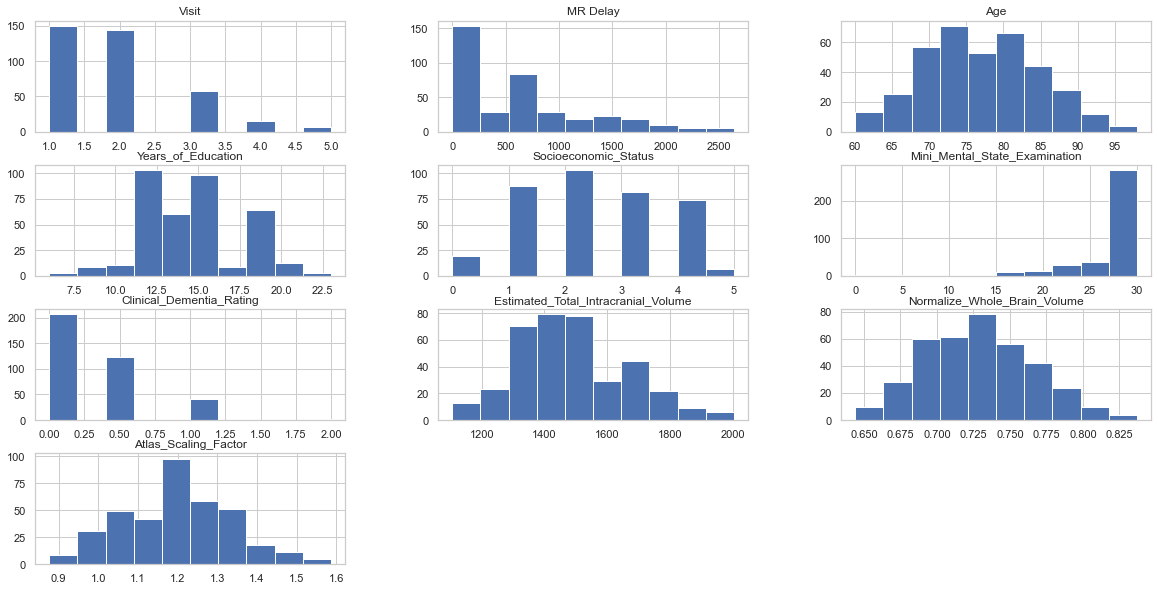

In [229]:
df.hist(figsize=(20,10),color='b')
plt.show()

### BOXPLOT 

#### BOXPLOT FOR AGE ATTRIBUTE

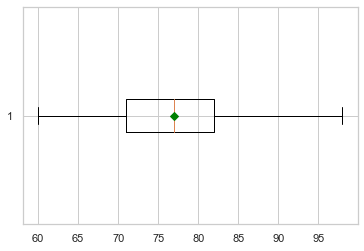

In [230]:
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df['Age'], vert=False, flierprops=red_circle, 
             showmeans=True, meanprops=mean_shape);

#### BOXPLOT FOR YEAR OF EDUCATION ATTRIBUTE

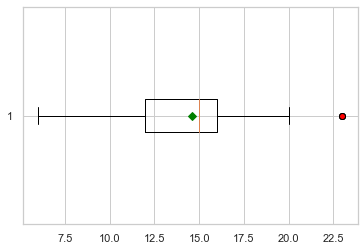

In [231]:
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df['Years_of_Education'], vert=False, flierprops=red_circle, 
             showmeans=True, meanprops=mean_shape);

#### BOXPLOT FOR SOCIOECONOMIC STATUS ATTRIBUTE

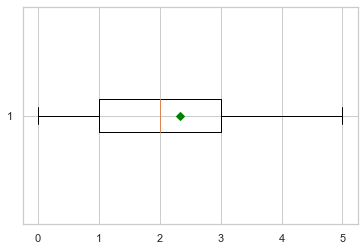

In [232]:
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df['Socioeconomic_Status'], vert=False, flierprops=red_circle, 
             showmeans=True, meanprops=mean_shape);

#### BOXPLOT FOR MINI MENTAL STATE EXAMINATION ATTRIBUTE

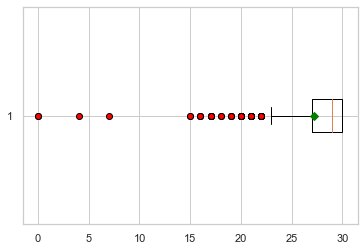

In [233]:
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df['Mini_Mental_State_Examination'], vert=False, flierprops=red_circle, 
             showmeans=True, meanprops=mean_shape);

#### BOXPLOT FOR CLINICAL DEMENTIA RATING ATTRIBUTE

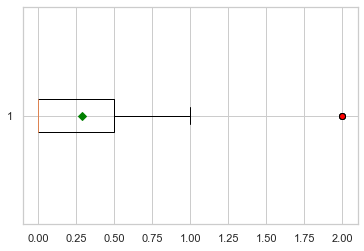

In [234]:
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df['Clinical_Dementia_Rating'], vert=False, flierprops=red_circle, 
             showmeans=True, meanprops=mean_shape);

#### BOXPLOT FOR ESTIMATED TOTAL INTRACRANICAL VOLUME ATTRIBUTE

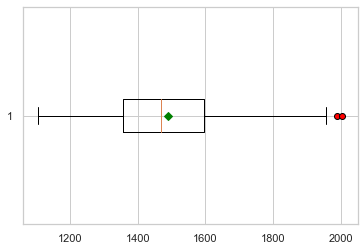

In [235]:
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df['Estimated_Total_Intracranial_Volume'], vert=False, flierprops=red_circle, 
             showmeans=True, meanprops=mean_shape);

#### BOXPLOT FOR NORMALIZE WHOLE BRAIN VOLUME ATTRIBUTE

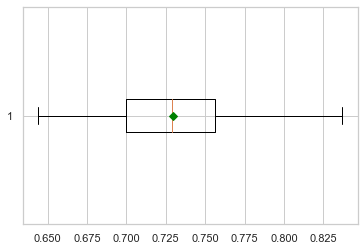

In [236]:
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df['Normalize_Whole_Brain_Volume'], vert=False, flierprops=red_circle, 
             showmeans=True, meanprops=mean_shape);

#### BOXPLOT FOR ATLAS SCALING FACTOR ATTRIBUTE

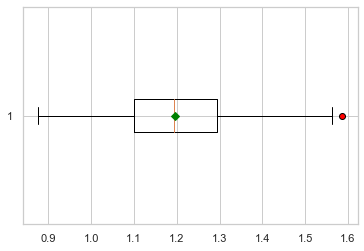

In [237]:
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df['Atlas_Scaling_Factor'], vert=False, flierprops=red_circle, 
             showmeans=True, meanprops=mean_shape);

#### Boxplots which shows the IQR(Interquartile Range ) for all attributes

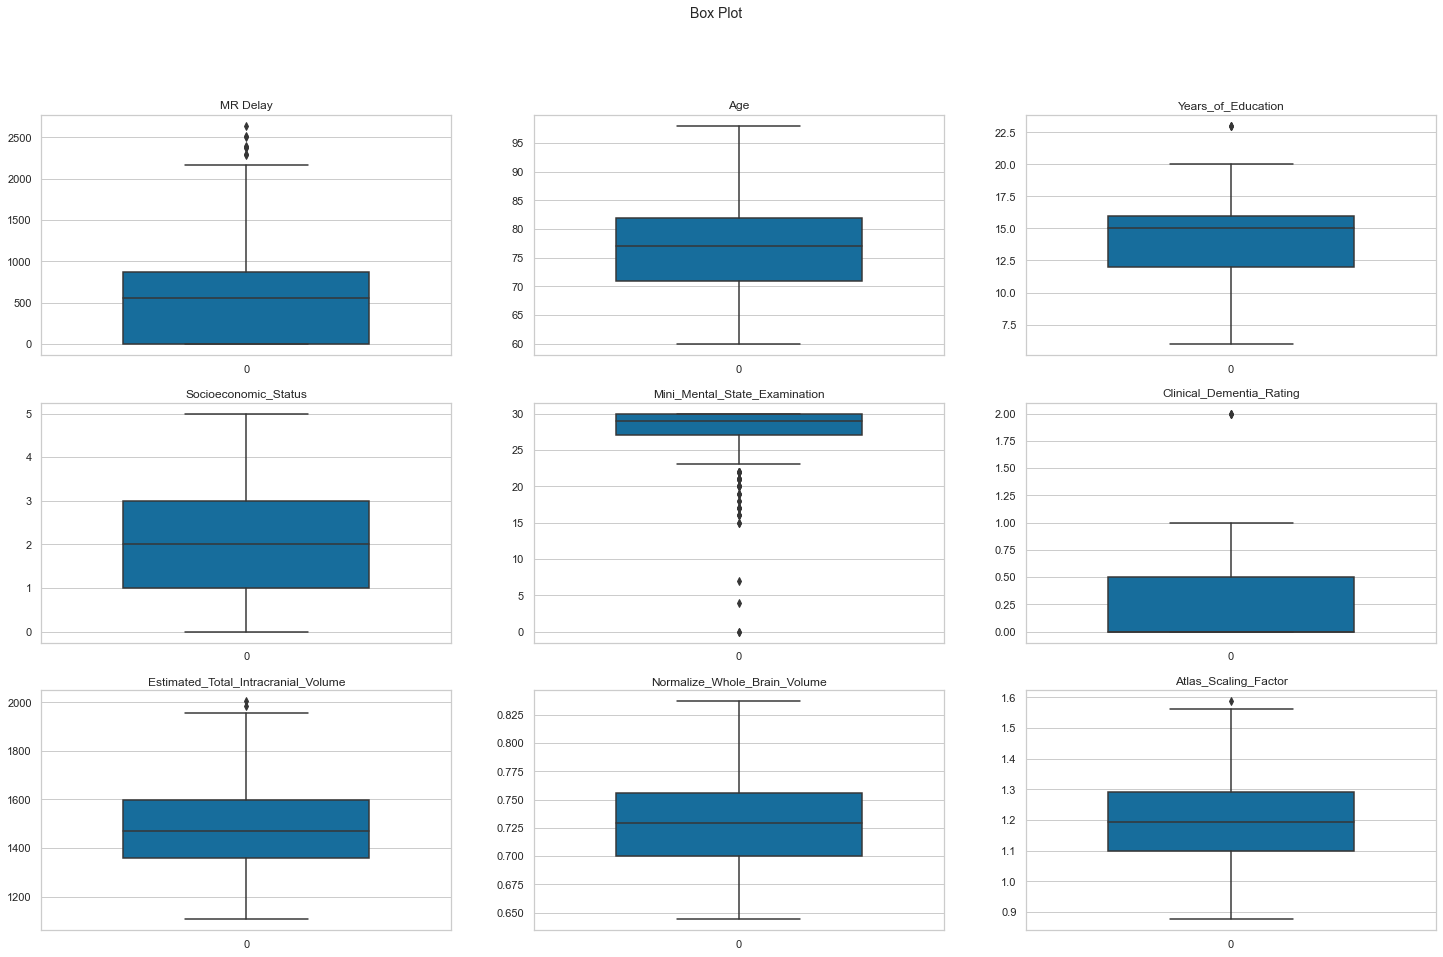

In [238]:
fig, axes = plt.subplots(3,3,figsize = (25,15))
fig.suptitle("Box Plot",fontsize=14)
sns.set_style("whitegrid")

sns.boxplot(data=df['MR Delay'], orient="v",width=0.6, palette="colorblind",ax = axes[0][0]).set(title="MR Delay");
sns.boxplot(data=df['Age'], orient="v",width=0.6, palette="colorblind",ax = axes[0][1]).set(title="Age");
sns.boxplot(data=df['Years_of_Education'], orient="v",width=0.6, palette="colorblind",ax = axes[0][2]).set(title="Years_of_Education");
sns.boxplot(data=df['Socioeconomic_Status'], orient="v",width=0.6, palette="colorblind",ax = axes[1][0]).set(title="Socioeconomic_Status");
sns.boxplot(data=df['Mini_Mental_State_Examination'], orient="v",width=0.6, palette="colorblind",ax = axes[1][1]).set(title="Mini_Mental_State_Examination");
sns.boxplot(data=df['Clinical_Dementia_Rating'], orient="v",width=0.6, palette="colorblind",ax = axes[1][2]).set(title="Clinical_Dementia_Rating");
sns.boxplot(data=df['Estimated_Total_Intracranial_Volume'], orient="v",width=0.6, palette="colorblind",ax = axes[2][0]).set(title="Estimated_Total_Intracranial_Volume");
sns.boxplot(data=df['Normalize_Whole_Brain_Volume'], orient="v",width=0.6, palette="colorblind",ax = axes[2][1]).set(title="Normalize_Whole_Brain_Volume");
sns.boxplot(data=df['Atlas_Scaling_Factor'], orient="v",width=0.6, palette="colorblind",ax = axes[2][2]).set(title="Atlas_Scaling_Factor");


#### FIND THE OUTLIERS IN EACH OF THE COLUMN

In [239]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['MR Delay',
              'Age','Years_of_Education','Socioeconomic_Status','Mini_Mental_State_Examination',
              'Clinical_Dementia_Rating','Estimated_Total_Intracranial_Volume',
              'Normalize_Whole_Brain_Volume','Atlas_Scaling_Factor']
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(df[item]))

Outliers: 

MR Delay :  (array([ 25,  64, 182, 201, 221, 263, 267, 268], dtype=int64),)
Age :  (array([], dtype=int64),)
Years_of_Education :  (array([231, 232, 233], dtype=int64),)
Socioeconomic_Status :  (array([], dtype=int64),)
Mini_Mental_State_Examination :  (array([ 39,  47,  48,  53,  54,  57,  58,  59,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  93,  99, 101, 102, 109, 110,
       111, 122, 123, 124, 127, 128, 130, 138, 150, 151, 154, 155, 161,
       165, 174, 175, 177, 179], dtype=int64),)
Clinical_Dementia_Rating :  (array([109, 138, 163], dtype=int64),)
Estimated_Total_Intracranial_Volume :  (array([183, 184], dtype=int64),)
Normalize_Whole_Brain_Volume :  (array([], dtype=int64),)
Atlas_Scaling_Factor :  (array([327], dtype=int64),)


### Correlation

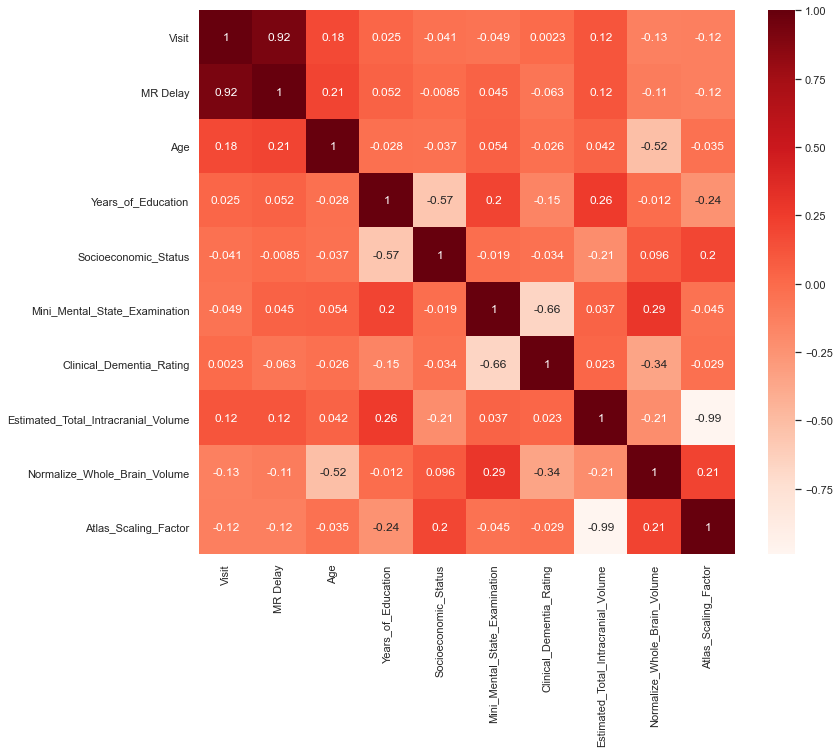

In [240]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### CONVERTING CATEGORICAL DATA INTO NUMERICAL DATA

In [241]:
import category_encoders as ce

encoder= ce.OrdinalEncoder(cols=['Group'],return_df=True,
                           mapping=[{'col':'Group',
'mapping':{'Demented':1,'Nondemented':0}}])
df['Gender'] = df['Gender'].replace(['F','M'], [0,1]) 

for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
df.head()

,Group,Visit,MR Delay,Gender,Dominant_Hand,Age,Years_of_Education,Socioeconomic_Status,Mini_Mental_State_Examination,Clinical_Dementia_Rating,Estimated_Total_Intracranial_Volume,Normalize_Whole_Brain_Volume,Atlas_Scaling_Factor
0,0,0,0,0,0,27,5,1,18,0,104,53,167
1,0,2,19,0,0,28,5,1,17,0,99,51,172
2,0,3,187,0,0,32,5,1,15,1,113,35,159
3,0,0,0,1,0,20,10,1,17,0,204,32,77
4,0,1,88,1,0,22,10,1,16,1,210,16,71


### Preparing the Data for Machine Learning

#### Normalization(Normalizer method)

In [242]:
from pandas import read_csv
from sklearn.preprocessing import Normalizer

feature_col_names = ["Gender",
              "Age","Years_of_Education","Socioeconomic_Status","Mini_Mental_State_Examination",
              "Clinical_Dementia_Rating","Estimated_Total_Intracranial_Volume",
              "Normalize_Whole_Brain_Volume","Atlas_Scaling_Factor"]
predicted_class_names = ['Group']
X = df[feature_col_names].values
y = df[predicted_class_names].values

scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
print("Original data: \n\n", df.values)
print("\nNormalized data: \n\n", normalizedX[0:5,:])

Original data: 

 [[  0   0   0 ... 104  53 167]
 [  0   2  19 ...  99  51 172]
 [  0   3 187 ... 113  35 159]
 ...
 [  1   0   0 ...  51 126 215]
 [  1   1  90 ...  56 124 211]
 [  1   2 169 ...  60 126 208]]

Normalized data: 

 [[0.         0.13082618 0.02422707 0.00484541 0.08721745 0.
  0.50392305 0.25680694 0.80918413]
 [0.         0.13489473 0.02408834 0.00481767 0.08190037 0.
  0.47694922 0.24570112 0.82863905]
 [0.         0.15890926 0.02482957 0.00496591 0.07448871 0.00496591
  0.56114831 0.173807   0.78958037]
 [0.00450104 0.09002071 0.04501035 0.00450104 0.0765176  0.
  0.91821121 0.14403313 0.34657972]
 [0.00446144 0.09815171 0.04461441 0.00446144 0.07138306 0.00446144
  0.93690268 0.07138306 0.31676233]]


#### Standardization (Normal Distribution)

In [243]:
from sklearn.preprocessing import StandardScaler

feature_col_names = ["Gender",
              "Age","Years_of_Education","Socioeconomic_Status","Mini_Mental_State_Examination",
              "Clinical_Dementia_Rating","Estimated_Total_Intracranial_Volume",
              "Normalize_Whole_Brain_Volume","Atlas_Scaling_Factor"]
predicted_class_names = ['Group']
X = df[feature_col_names].values
y = df[predicted_class_names].values

scaler = StandardScaler().fit(X) 
standardX = scaler.transform(X) 


print("Original Data: nn", df.values)
print("nStandardized Data: nn", standardX[0:5,:])

Original Data: nn [[  0   0   0 ... 104  53 167]
 [  0   2  19 ...  99  51 172]
 [  0   3 187 ... 113  35 159]
 ...
 [  1   0   0 ...  51 126 215]
 [  1   1  90 ...  56 124 211]
 [  1   2 169 ...  60 126 208]]
nStandardized Data: nn [[-0.86670278  1.30873772 -0.23626702 -1.08662161  0.74300564 -0.80129021
  -0.49883806 -0.38964158  0.49051805]
 [-0.86670278  1.43978716 -0.23626702 -1.08662161  0.46751746 -0.80129021
  -0.56291499 -0.45043903  0.56102954]
 [-0.86670278  1.96398492 -0.23626702 -1.08662161 -0.08345888  0.59535114
  -0.38349958 -0.93681864  0.37769965]
 [ 1.15379808  0.39139163  1.69635575 -1.08662161  0.46751746 -0.80129021
   0.78270059 -1.02801482 -0.77868889]
 [ 1.15379808  0.65349051  1.69635575 -1.08662161  0.19202929  0.59535114
   0.85959291 -1.51439443 -0.86330269]]


#### Binarization (Transform data into 1 or 0)

In [244]:
from sklearn.preprocessing import Binarizer
feature_col_names = ["Gender",
              "Age","Years_of_Education","Socioeconomic_Status","Mini_Mental_State_Examination",
              "Clinical_Dementia_Rating","Estimated_Total_Intracranial_Volume",
              "Normalize_Whole_Brain_Volume","Atlas_Scaling_Factor"]
predicted_class_names = ['Group']
X = df[feature_col_names].values
y = df[predicted_class_names].values

binarizer = Binarizer (threshold = 0.2).fit(X)
binaryX = binarizer.transform(X)


print("Original Data:", df.values)
print("nBinarized Data:", binaryX[0:5,:])

Original Data: [[  0   0   0 ... 104  53 167]
 [  0   2  19 ...  99  51 172]
 [  0   3 187 ... 113  35 159]
 ...
 [  1   0   0 ...  51 126 215]
 [  1   1  90 ...  56 124 211]
 [  1   2 169 ...  60 126 208]]
nBinarized Data: [[0 1 1 1 1 0 1 1 1]
 [0 1 1 1 1 0 1 1 1]
 [0 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 1 1]]


## Feature Selection

#### Univariate Selection

In [245]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
feature_col_names = ["Gender",
              "Age","Years_of_Education","Socioeconomic_Status","Mini_Mental_State_Examination",
              "Clinical_Dementia_Rating","Estimated_Total_Intracranial_Volume",
              "Normalize_Whole_Brain_Volume","Atlas_Scaling_Factor"]
predicted_class_names = ['Group']
X = df[feature_col_names].values
y = df[predicted_class_names].values

best_var = SelectKBest (score_func = chi2, k = 4)

fit = best_var.fit(X, y)
features = fit.transform(X)


print('Original number of features:', X.shape[1])
print('Reduced number of features:', features.shape[1])
print('Features:', features)

Original number of features: 9
Reduced number of features: 4
Features: [[ 18   0 104  53]
 [ 17   0  99  51]
 [ 15   1 113  35]
 ...
 [ 18   0  51 126]
 [ 18   0  56 124]
 [ 18   0  60 126]]


#### Recursive Elimination of Attributes (RFE)

In [246]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
feature_col_names = ["Gender",
              "Age","Years_of_Education","Socioeconomic_Status","Mini_Mental_State_Examination",
              "Clinical_Dementia_Rating","Estimated_Total_Intracranial_Volume",
              "Normalize_Whole_Brain_Volume","Atlas_Scaling_Factor"]
predicted_class_names = ['Group']
X = df[feature_col_names].values
y = df[predicted_class_names].values


model = LogisticRegression()


rfe = RFE (model, 3) 
fit = rfe.fit(X, y)

print("Predictor Variables:", df.columns[0:8])
print("Selected Variables: %s" % fit.support_)
print("Attribute Ranking: %s" % fit.ranking_)
print("Number of Best Attributes: %d" % fit.n_features_)

Predictor Variables: Index(['Group', 'Visit', 'MR Delay', 'Gender', 'Dominant_Hand', 'Age',
       'Years_of_Education', 'Socioeconomic_Status'],
      dtype='object')
Selected Variables: [False False False  True  True  True False False False]
Attribute Ranking: [3 6 2 1 1 1 7 5 4]
Number of Best Attributes: 3


#### Principal Component Analysis (PCA)

In [247]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

feature_col_names = ["Gender",
              "Age","Years_of_Education","Socioeconomic_Status","Mini_Mental_State_Examination",
              "Clinical_Dementia_Rating","Estimated_Total_Intracranial_Volume",
              "Normalize_Whole_Brain_Volume","Atlas_Scaling_Factor"]
predicted_class_names = ['Group']
X = df[feature_col_names].values
y = df[predicted_class_names].values

scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X) 


pca = PCA(n_components = 4)


fit = pca.fit (rescaledX)


print("Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Variance: [0.46033887 0.16307584 0.12408929 0.09471779]
[[ 0.82098468  0.00720597  0.08028248 -0.07412332 -0.05635035  0.09964379
   0.37620535 -0.15041905 -0.36977302]
 [ 0.24137272  0.02148232 -0.45775162  0.37829731 -0.37956472  0.45024262
  -0.31463906 -0.21790812  0.30880874]
 [-0.34048569  0.31641489  0.20919734 -0.40986746 -0.2880909   0.38028146
   0.12358923 -0.56073963 -0.12199451]
 [ 0.29794096 -0.26642671  0.42387696 -0.50900565 -0.05317502  0.16650739
  -0.42053587  0.15693285  0.4116539 ]]


#### APPLYING MACHINE LEARNING ALGORITHM

In [248]:
from sklearn.model_selection import train_test_split

feature_col_names = ["Gender",
              "Age","Years_of_Education","Socioeconomic_Status","Mini_Mental_State_Examination",
              "Clinical_Dementia_Rating","Estimated_Total_Intracranial_Volume",
              "Normalize_Whole_Brain_Volume","Atlas_Scaling_Factor"]
predicted_class_names = ['Group']
X = df[feature_col_names].values
y = df[predicted_class_names].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [249]:
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [250]:
def report_performance(model):
    model_test = model.predict(X_test)
    print("\n\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    plot_confusion_metrix(y_test, model_test)
    print("\n\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    


In [251]:
total_fpr = {}
total_tpr = {}
def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)
    total_fpr[str((str(model).split('(')[0]))] = fpr
    total_tpr[str((str(model).split('(')[0]))] = tpr
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [252]:
total_accuracy = {}
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAccuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu
 

#### Feature scaling

In [253]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#### Logistic Regression




Confusion Matrix:
[[51  6]
 [ 0 55]]


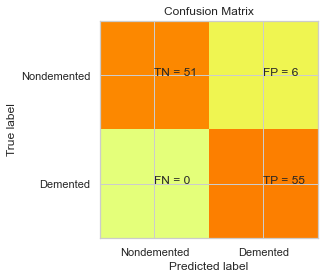




Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        57
           1       0.90      1.00      0.95        55

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112


Accuracy Of the Model:  0.9464285714285714 




In [254]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
report_performance(logreg) 
accuracy(logreg)


#### Random Forest Classifier




Confusion Matrix:
[[53  4]
 [ 1 54]]


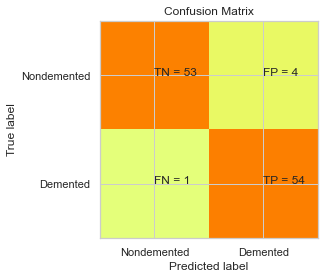




Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        57
           1       0.93      0.98      0.96        55

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112


Accuracy Of the Model:  0.9553571428571429 




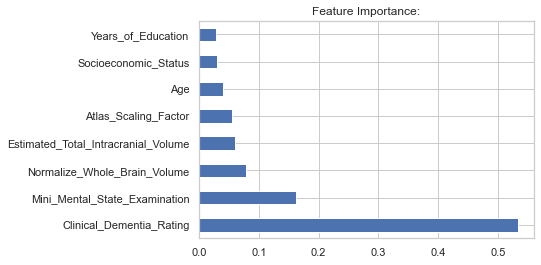

In [255]:
rfc=RandomForestClassifier()

param_grid = { 
    'n_estimators': [100],
    'max_features': ['auto'],
    'max_depth' : [1,2,3,4],
    'criterion' :['entropy']
}
rfc.fit(X_train, y_train)
report_performance(rfc) 
accuracy(rfc)
feat_importances = pd.Series(rfc.feature_importances_, index=feature_col_names)
feat_importances.nlargest(8).plot(kind='barh')

plt.title("Feature Importance:")
plt.show()

#### SVM




Confusion Matrix:
[[50  7]
 [ 0 55]]


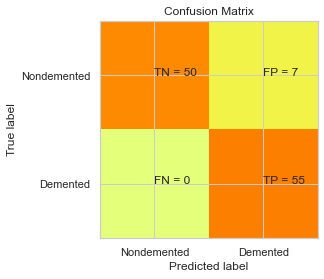




Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        57
           1       0.89      1.00      0.94        55

    accuracy                           0.94       112
   macro avg       0.94      0.94      0.94       112
weighted avg       0.94      0.94      0.94       112


Accuracy Of the Model:  0.9375 




In [256]:
svm = SVC(kernel="poly", C=0.3,random_state=0)
svm.fit(X_train, y_train.ravel())
report_performance(svm) 
accuracy(svm)



#### Decision Tree Classifier




Confusion Matrix:
[[51  6]
 [ 0 55]]


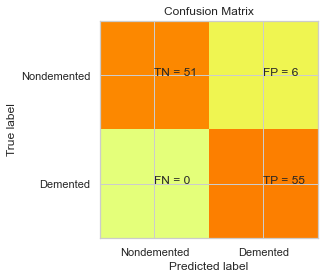




Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        57
           1       0.90      1.00      0.95        55

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112



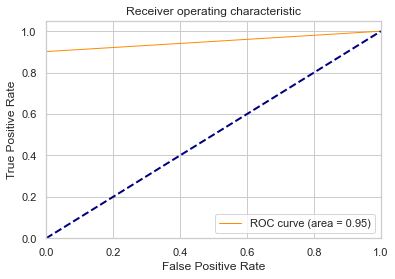


Accuracy Of the Model:  0.9464285714285714 




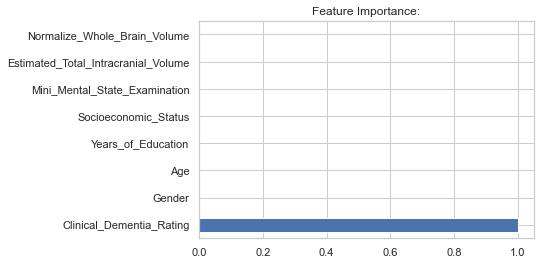

In [257]:
clf_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=1,random_state=0)
clf_dtc.fit(X_train, y_train)
report_performance(clf_dtc) 
roc_curves(clf_dtc)
accuracy(clf_dtc)
feat_importances = pd.Series(clf_dtc.feature_importances_, index=feature_col_names)
feat_importances.nlargest(8).plot(kind='barh')
plt.title("Feature Importance:")
plt.show()


#### XGB Classifier

[12:15:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.



Confusion Matrix:
[[53  4]
 [ 3 52]]


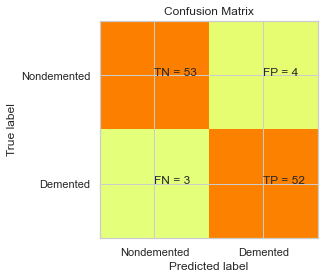




Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        57
           1       0.93      0.95      0.94        55

    accuracy                           0.94       112
   macro avg       0.94      0.94      0.94       112
weighted avg       0.94      0.94      0.94       112



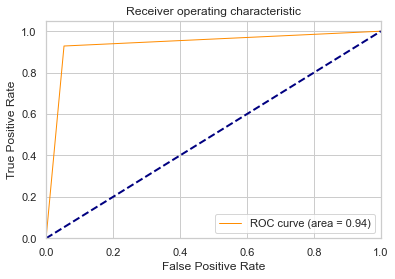


Accuracy Of the Model:  0.9375 




In [258]:
params = {
        'min_child_weight': [1, 5, 20],
        
        'max_depth': [1,2,3]
        }

clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)
report_performance(clf_xgb) 
roc_curves(clf_xgb)
accuracy(clf_xgb)


#### K-Nearest Neighbors Classifier




Confusion Matrix:
[[50  7]
 [ 1 54]]


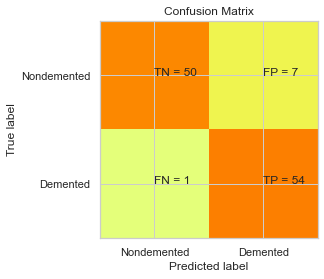




Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        57
           1       0.89      0.98      0.93        55

    accuracy                           0.93       112
   macro avg       0.93      0.93      0.93       112
weighted avg       0.93      0.93      0.93       112



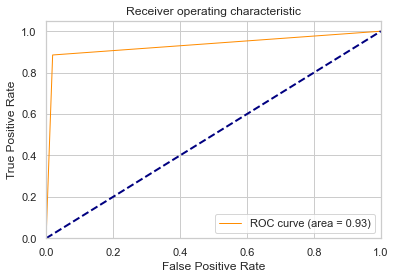


Accuracy Of the Model:  0.9285714285714286 




In [259]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
report_performance(knn) 
roc_curves(knn)
accuracy(knn)

#### Naive Bayes Classifier




Confusion Matrix:
[[51  6]
 [ 0 55]]


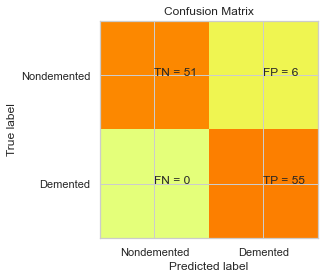




Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        57
           1       0.90      1.00      0.95        55

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112



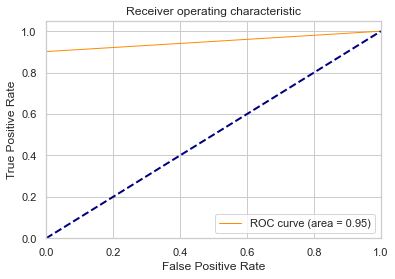


Accuracy Of the Model:  0.9464285714285714 




In [260]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
report_performance(nb)
roc_curves(nb)
accuracy(nb)


#### ExtraTrees Classifier

ExtraTreesClassifier : 



Confusion Matrix:
[[51  6]
 [ 0 55]]


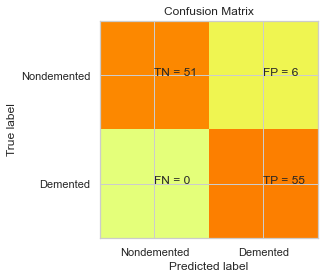




Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        57
           1       0.90      1.00      0.95        55

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112



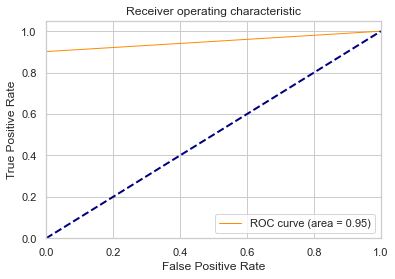


Accuracy Of the Model:  0.9464285714285714 




In [261]:
etc =ExtraTreesClassifier(criterion='gini',max_depth=5,random_state=0)
print(str(etc).split('(')[0],": ")
etc.fit(X_train,y_train)
X = pd.DataFrame(X_train)
report_performance(etc)
roc_curves(etc)
accuracy(etc)


#### GradientBoosting Classifier

GradientBoostingClassifier : 



Confusion Matrix:
[[53  4]
 [ 3 52]]


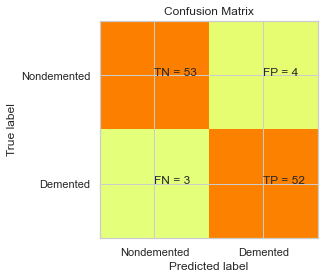




Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        57
           1       0.93      0.95      0.94        55

    accuracy                           0.94       112
   macro avg       0.94      0.94      0.94       112
weighted avg       0.94      0.94      0.94       112



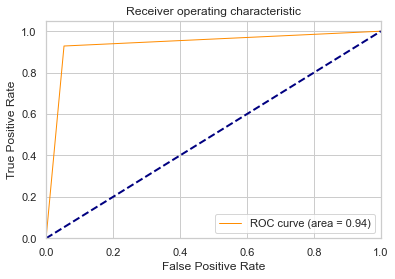


Accuracy Of the Model:  0.9375 




In [262]:
gbc = GradientBoostingClassifier()
print(str(gbc).split('(')[0],": ")
gbc.fit(X_train,y_train.ravel())
X = pd.DataFrame(X_train)
report_performance(gbc)
roc_curves(gbc)
accuracy(gbc)


#### AdaBoost Classifier

AdaBoostClassifier : 



Confusion Matrix:
[[52  5]
 [ 6 49]]


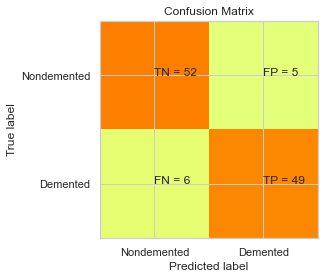




Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.91      0.90        57
           1       0.91      0.89      0.90        55

    accuracy                           0.90       112
   macro avg       0.90      0.90      0.90       112
weighted avg       0.90      0.90      0.90       112



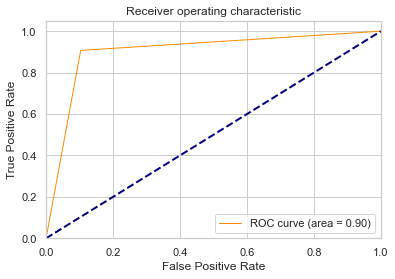


Accuracy Of the Model:  0.9017857142857143 




In [263]:
abc =AdaBoostClassifier()
print(str(abc).split('(')[0],": ")
abc.fit(X_train,y_train.ravel())
X = pd.DataFrame(X_train)
report_performance(abc)
roc_curves(abc)
accuracy(abc)

#### Model Comparison

Text(0, 0.5, 'Accuracy')

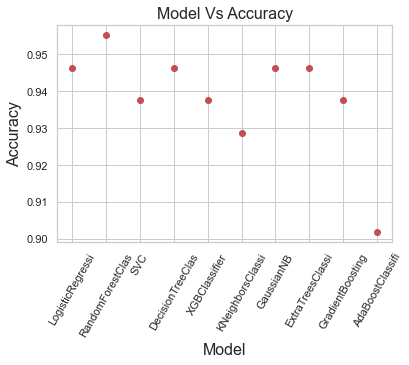

In [264]:
data = total_accuracy.values()
labels = total_accuracy.keys()
plt.plot([i for i, e in enumerate(data)], data, 'ro'); plt.xticks([i for i, e in enumerate(labels)], [l[0:16] for l in labels])
plt.title("Model Vs Accuracy",fontsize = 16)
plt.xlabel('Model',fontsize = 16)
plt.xticks(rotation = 60)
plt.ylabel('Accuracy',fontsize = 16)



#### ACCURACY OF REFINED DATA 

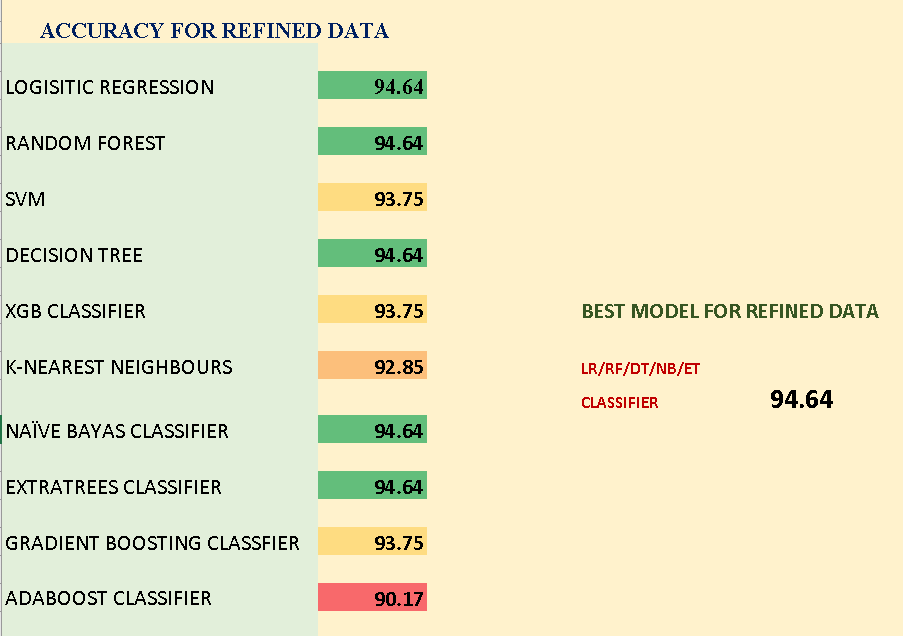

### SPLITTING THE DATASET USING ENTROPY

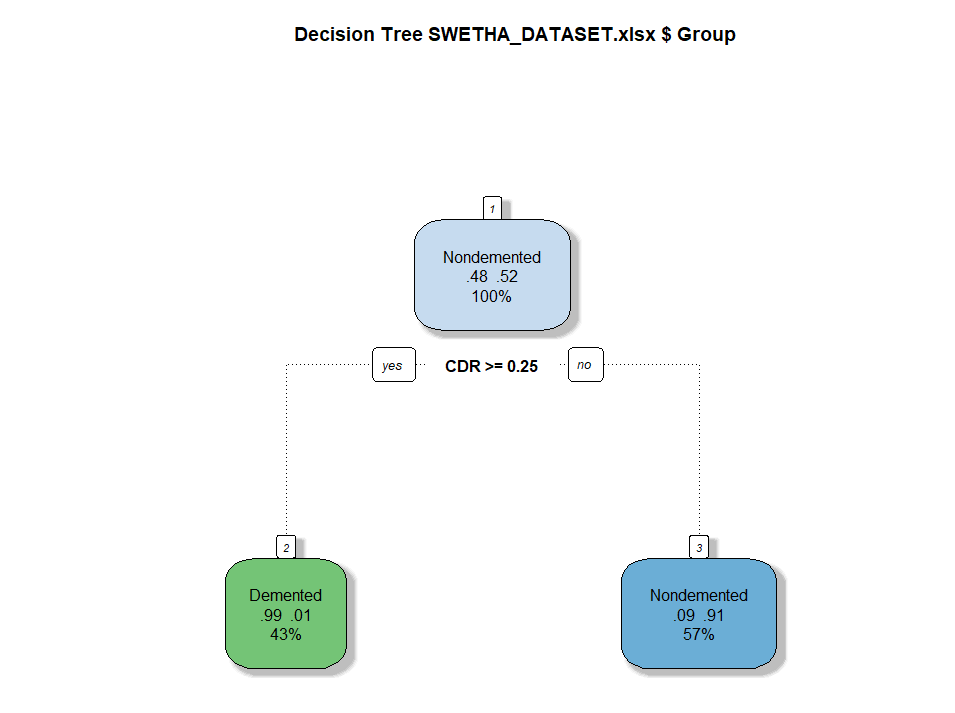

After partitioning,the dataset are divided into two entropy dataset

#### ACCURACY(ENTROPY 1 AND 2 DATASET)

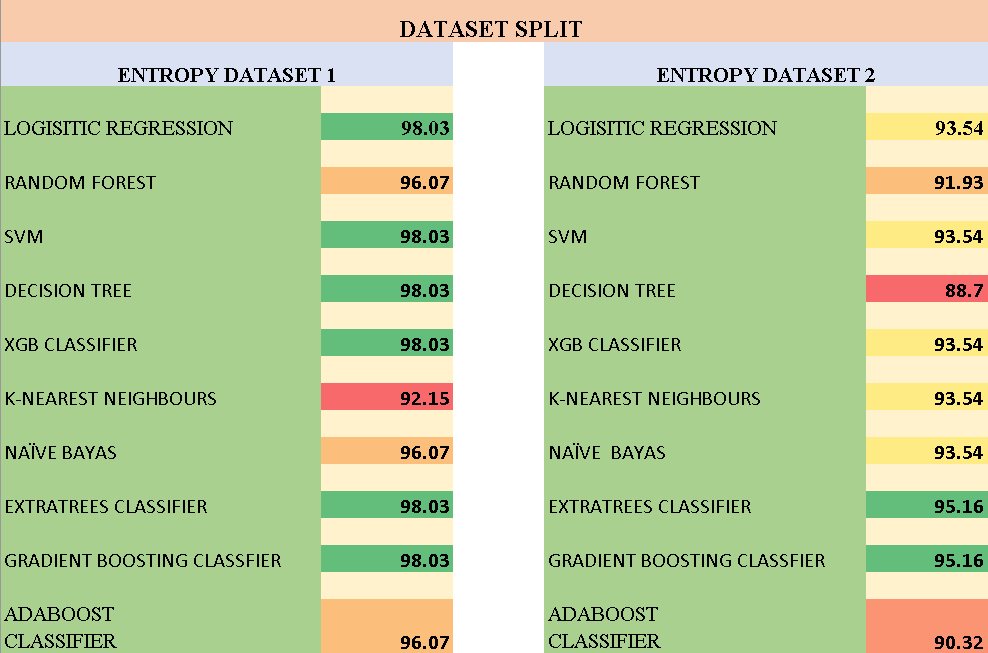

 In this two entropy datasets Extratrees Classifier and GradientBoosting Classifier gives highest accuracy compared with other models

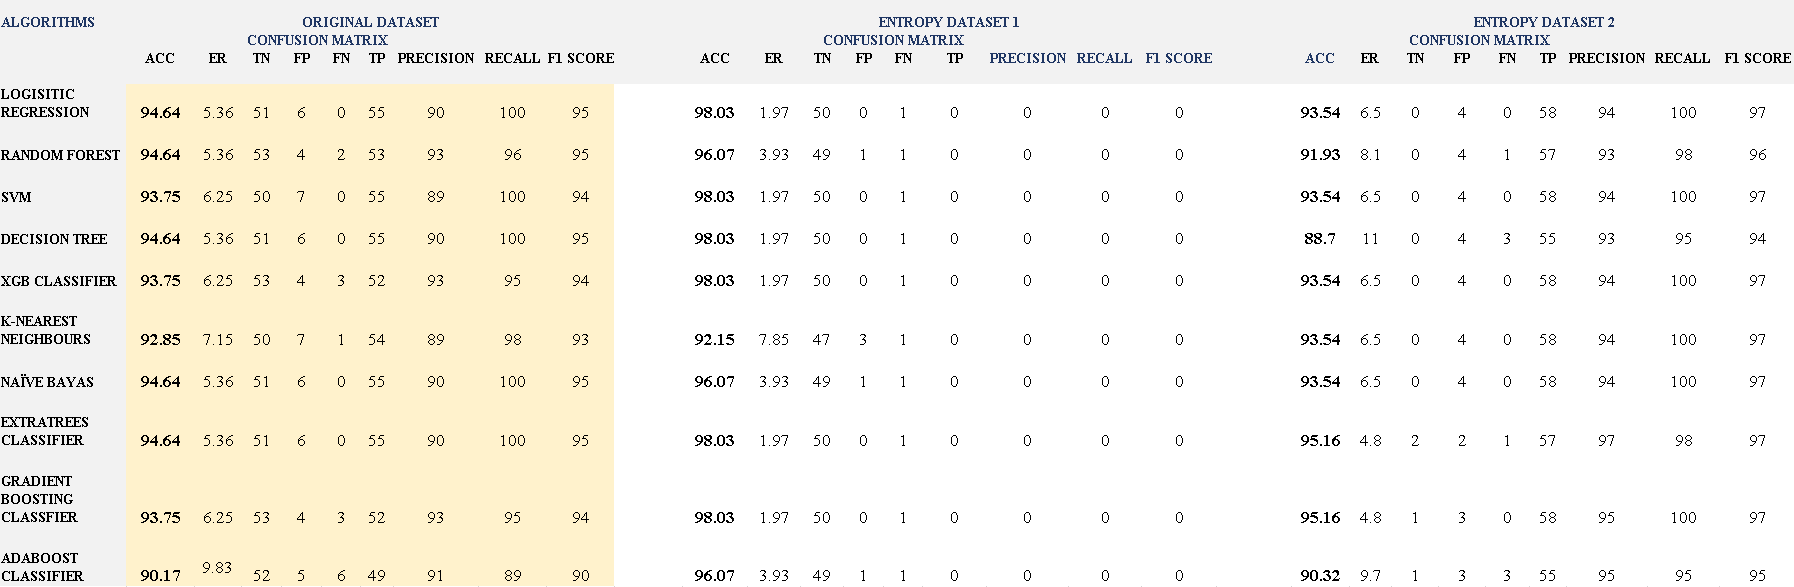

#### HYBRID CLASSIFIER(ETGB)

In [265]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
estimators = []
model1 = ExtraTreesClassifier(criterion='entropy', max_depth=5,min_samples_leaf=5,min_samples_split=11,n_estimators=200)
estimators.append(('et1', model1))

model2 = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=10,min_samples_leaf=30,max_depth=10,max_features='sqrt',random_state=10)
    
estimators.append(('gb1', model2))

ensemble = VotingClassifier(estimators,voting='hard')
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)






Confusion Matrix:
[[53  4]
 [ 3 52]]


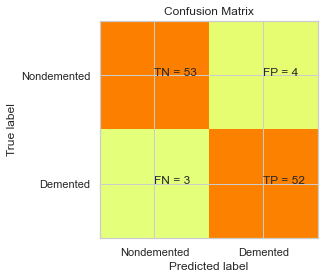




Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        57
           1       0.93      0.95      0.94        55

    accuracy                           0.94       112
   macro avg       0.94      0.94      0.94       112
weighted avg       0.94      0.94      0.94       112



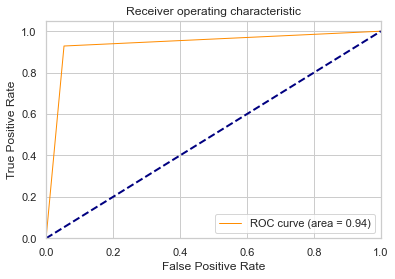

ACCURACY OF ETGB: 0.9502747252747253


In [266]:
cv=RepeatedStratifiedKFold(n_splits=20,n_repeats=2,random_state=1)
n_scores=cross_val_score(ensemble, X_train, y_train, cv=cv)
report_performance(ensemble)
roc_curves(ensemble)
print("ACCURACY OF ETGB:",n_scores.mean())